In [1]:
import pandas as pd

# List of CSV files
csv_files = ['gt_2011.csv', 'gt_2012.csv', 'gt_2013.csv', 'gt_2014.csv', 'gt_2015.csv']

# List to hold DataFrames for each CSV file
dfs = []

# Read each CSV file and append its DataFrame to dfs list
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames in dfs list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Display combined DataFrame
print(combined_df)
   

           AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.462   

             CO      NOX  


In [2]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [4]:
# Define features (X)
X = df[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO']]

# Define target variable (y)
y = df['NOX'] 


In [5]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the KNN model
knn5 = KNeighborsRegressor(n_neighbors=5)  

In [7]:
# Fit the model on the training data
knn5.fit(X_train, y_train)

KNeighborsRegressor()

In [8]:
# Predict on the test data
y_pred = knn5.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error KNN5:", mse)
print("R-squared Score:KNN5", r2)


Mean Squared Error KNN5: 15.891931398266758
R-squared Score:KNN5 0.8753808677277626


In [9]:
knn8 = KNeighborsRegressor(n_neighbors=8)  

# Fit the model on the training data
knn8.fit(X_train, y_train)

# Predict on the test data
y_pred = knn8.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error KNN8:", mse)
print("R-squared Score:KNN8", r2)


Mean Squared Error KNN8: 16.199089777833024
R-squared Score:KNN8 0.8729722359653659


In [10]:
knn13 = KNeighborsRegressor(n_neighbors=8)  

# Fit the model on the training data
knn13.fit(X_train, y_train)

# Predict on the test data
y_pred = knn13.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error KNN13:", mse)
print("R-squared Score:KNN13", r2)

Mean Squared Error KNN13: 16.199089777833024
R-squared Score:KNN13 0.8729722359653659


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the KNN model
knn = KNeighborsRegressor()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [2,3, 5, 8, 13,21],  
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2] 
}

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model from grid search
best_knn = grid_search.best_estimator_

# Predict on the test data
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)  
print("R-squared Score:", r2)


Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mean Squared Error: 10.51850680777246
R-squared Score: 0.9175174396154775


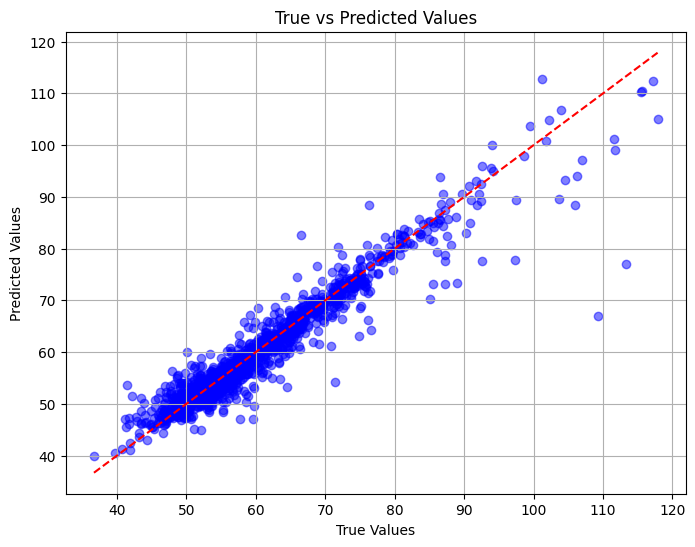

In [12]:
import matplotlib.pyplot as plt

# Plot the predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


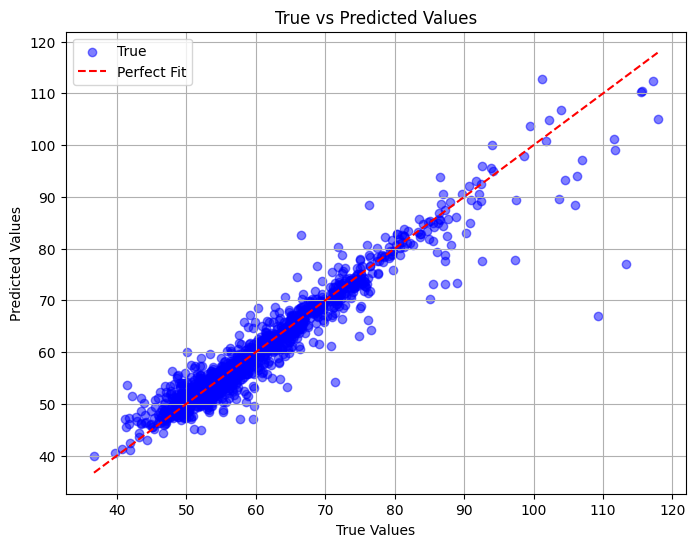

In [13]:
import matplotlib.pyplot as plt

# Plot the predicted vs true values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='True')  # True values in blue
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect Fit')  # Perfect fit line in red
plt.title('True vs Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()  # Show legend with labels
plt.show()
